<a href="https://colab.research.google.com/github/matthewdillonsmith/MLnotes/blob/main/Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

##Supervised Learning
<hr>

- <b>What is machine learning?</b>
  - The art and science of:
    - giving computers the ability to learn and to make decision from data
    - without being explicitly programmed
  - Examples:
    - Learning to predict whether an email is spam or not
    - Clustering wikiperdia entries into different categories
  -  <b><i><u>Supervised learning</u></i></b>: Uses labeled data
  -  <b><i><u>Unsupervised learning</u></i></b>: Uses unlabeled data
<br>
<br>

- <b>Unsupervised learning</b>:
  - Uncovering hidden patterns from unlabeled data
  - Example:
    - Grouping customers into distinct caategories (Clustering)
<br>
<br>

- <b>Reinforcement learning</b>:
  - Software agents interact with an environment
    - Learning how to optimize their behavior
    - Given a system of rewards and punishments
    - Draws inspiration from behavioral psychology
  - Applications:
    - Economics
    - Genetics
    - Game playing
<br>
<br>

- <b>Supervised learning</b>:
  - Predictor variables/features and a target variable
  - Aim: Predict the target variable, given th predictor variables
    - Classification: Target variable consists of categories
    - Regression: Target variable is continuous
  - Automate time-consuming or expensive manual tasks
    - Example: Doctor's diagnosis
  - Make predictions about the future 
    - Example: will a customer click on an ad or not?
  - Need labeled data
    - Historical data with labels
    - Experiments to get labeled data
    - Crowd-sourcing labeled data

<br>
<br>

- <b>Naming conventions</b>:
  - Features = predictor variables = independent variables
  - Target variable = dependent variable = response variable

<br>
<br>

- <b>Supervised learning in Python</b>:
  - We will use scikit-learn/sklearn
    - Integrates will with the SciPy stack
  - Other libraries
    - TensorFlow
    - Keras







##Exploratory Data Analysis
<hr>

- The Iris dataset:
  - Features:
    - Petal Length
    - Petal Width
    - Sepal length
    - Sepal width
  - Target variable = SPECIES
    - Versicolor
    - Virginica
    - Setosa


###The Iris dataset in scikit-learn:

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris = datasets.load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape #('rows', 'colums')

(150, 4)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

###Exploratory Data Analysis (EDA)

In [6]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)

In [7]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


###Visual EDA

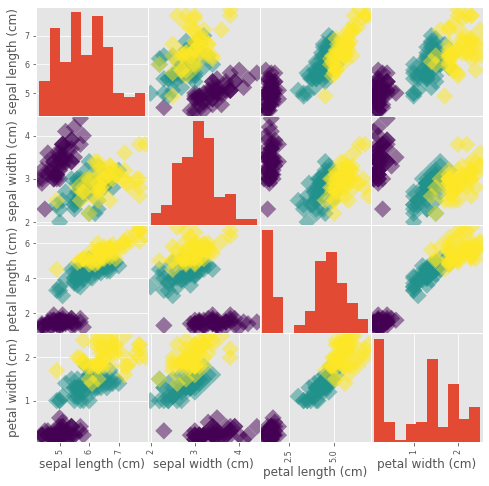

In [8]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = 'D')

##EDA PRACTICE

In [9]:
import seaborn as sns

In [10]:
# link to data used in practice: https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/

df_gov = pd.read_csv('/temp_data/congressvotingrecords.data.csv')

In [11]:
df_gov.replace(('y', 'n', '?'), (1,0, 0), inplace=True)

In [12]:
df_gov

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,republican,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,republican,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1


In [13]:
df_gov.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [14]:
df_gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class Name                              435 non-null    object
 1   handicapped-infants                     435 non-null    int64 
 2   water-project-cost-sharing              435 non-null    int64 
 3   adoption-of-the-budget-resolution       435 non-null    int64 
 4   physician-fee-freeze                    435 non-null    int64 
 5   el-salvador-aid                         435 non-null    int64 
 6   religious-groups-in-schools             435 non-null    int64 
 7   anti-satellite-test-ban                 435 non-null    int64 
 8   aid-to-nicaraguan-contras               435 non-null    int64 
 9   mx-missile                              435 non-null    int64 
 10  immigration                             435 non-null    int64 
 11  synfue

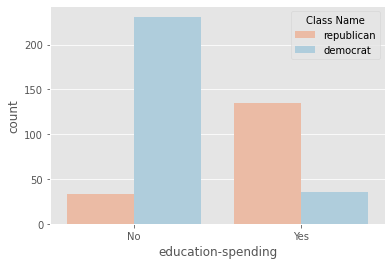

In [15]:
# Countplot for 'education' bill voting
plt.figure()
sns.countplot(x ='education-spending', hue = 'Class Name', data = df_gov, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes']) #if this throws an error, restart the runtime/kernal and it should work
plt.show()

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlaid onto the same figure.

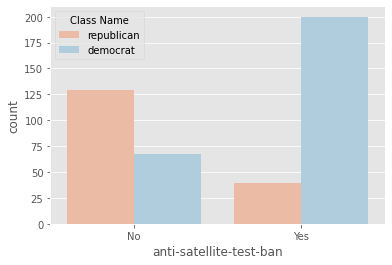

In [16]:
# Countplot for 'satellite' bill voting

plt.figure()
sns.countplot(x ='anti-satellite-test-ban', hue = 'Class Name', data = df_gov, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes']) #if this throws an error, restart the runtime/kernal and it should work
plt.show()

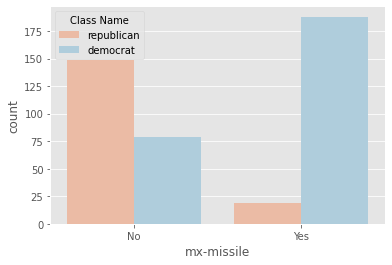

In [17]:
# Countplot for 'missile' bill voting

plt.figure()
sns.countplot(x ='mx-missile', hue = 'Class Name', data = df_gov, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes']) #if this throws an error, restart the runtime/kernal and it should work
plt.show()

###The classification challenge
<br>

- <b>k-Nearest Neighbors</b>
  - Basic idea: Predict the label of a data point by:
    - Looking at the 'k' closest labeled data points
    - Taking a mojority vote
  - Sets 'decision boudaries
    - We visualize them in a 2D space to show the categories

- <b>Scikit-learn fit and predict</b>
  - All machine learning models implemented as Python classes
  - Serve two purposes:
    - They implement the algorithms for learning and predicting
    - Store the information learned from the data
  - "Training" a model on the data = "Fitting" a model to the data
    - `.fit()` method
  - To predict the labels of the new data: `.predict()` method







- <b>Using scikit-learn to fit a classifier:</b>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(iris['data'], iris['target']) #features must be continous values

KNeighborsClassifier(n_neighbors=6)

In [19]:
iris['data'].shape

(150, 4)

In [20]:
iris['target'].shape

(150,)

- <b>Predicting on unlabeled data:</b>

In [27]:
X_new = np.array([
                   [5.6, 2.8, 3.9, 1.1],
                   [5.7, 2.6, 3.8, 1.3],
                   [4.7, 3.2, 1.3, 0.2]
])

X_new.shape

(3, 4)

In [28]:
prediction = knn.predict(X_new) # uses already fitted knn algorithm to predict outcomes based on this new data array
print(prediction)

[1 1 0]


###PRACTICE

1) Import KNeighborsClassifier from sklearn.neighbors.

2) Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

3) Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.

4) Fit the classifier to the data using the .fit() method.

5) Predict the labels of the training data, X.

6) Predict the label of the new data point X_new.

In [34]:
# 1) Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# 2) Create arrays for the features and the response variable
X = df_gov.drop('Class Name', axis=1).values
y = df_gov['Class Name'].values

# 3) Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# 4) Fit the classifier to the data
knn.fit(X, y)



KNeighborsClassifier(n_neighbors=6)

In [56]:
X_new_gov = np.array([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678, 0.398044, 0.737995])

# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
# 5) Predict the labels for the training data X
y_pred = knn.predict(X)

# 6) Predict and print the label for the new data point X_new
new_pred = knn.predict(X_new_gov.reshape(1,-1)) # need to reshape it like this (1,-1) since this is a 'single record'
print(f'New prediction: {new_pred}')


New prediction: ['democrat']


###Measuring model performance
<br>

- Could compute accuracy on data used to fit classifier...
- ...BUT, NOT indicative of ability generalize
- Split data into training and test data
- Fit/train the classifier on the training set
- Make predictions on test set
- Compare predictions with the known labels




- <b>Train, Test, Split</b>:

In [60]:
from sklearn.model_selection import train_test_split

In [64]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y) # default `test size` is 0.25

In [65]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Test set prdeictions: \n{y_pred}")

Test set prdeictions: 
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [66]:
knn.score(X_test, y_test)

0.9555555555555556

###PRACTICE

1) Import datasets from sklearn and matplotlib.pyplot as plt.

2) Load the digits dataset using the .load_digits() method on datasets.

3) Print the keys and DESCR of digits.

4) Print the shape of images and data keys using the . notation.

5) Display the 1011th image using plt.imshow(). This has been done for you, so hit submit to see which handwritten digit this happens to be!



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

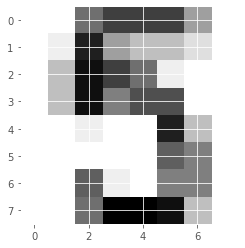

In [67]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
